In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('filtered_data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         4285 non-null   int64         
 1   date               4285 non-null   datetime64[ns]
 2   price              4285 non-null   float64       
 3   bedrooms           4285 non-null   int64         
 4   bathrooms          4285 non-null   float64       
 5   sqft_living        4285 non-null   float64       
 6   sqft_lot           4285 non-null   float64       
 7   floors             4285 non-null   float64       
 8   waterfront         4285 non-null   int64         
 9   view               4285 non-null   int64         
 10  condition          4285 non-null   int64         
 11  sqft_above         4285 non-null   int64         
 12  sqft_basement      4285 non-null   int64         
 13  yr_built           4285 non-null   int64         
 14  yr_renov

In [5]:
df['bathrooms'] = df['bathrooms'].round().astype(int)

In [25]:
mean=df['price'].mean()
mode=df['price'].mode()
median=df['price'].median()
print('Mean= ',mean)
print('Mode=',mode.iloc[0])
print('Median= ',median)

Mean=  487896.19257369894
Mode= 300000.0
Median=  450000.0


Text(0.5, 1.0, 'Price Distribution After Cleaning and Filtering')

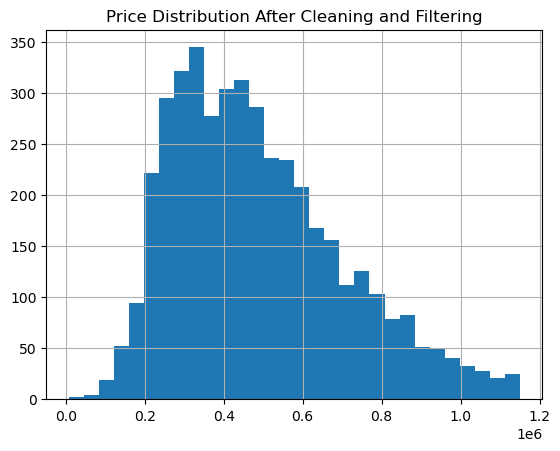

In [7]:
df['price'].describe()
df['price'].hist(bins=30)
plt.title('Price Distribution After Cleaning and Filtering')

Text(0.5, 1.0, 'Bedrooms vs Price')

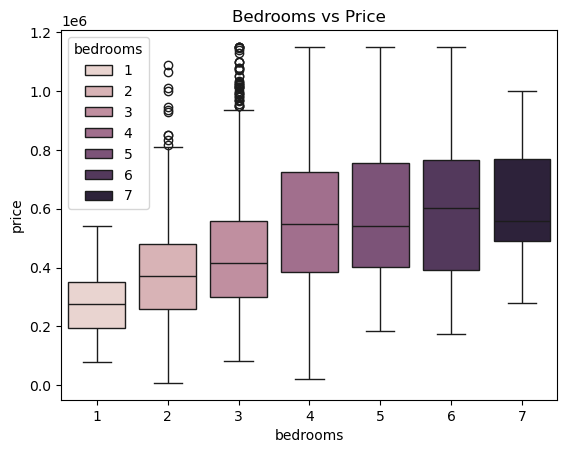

In [34]:
sns.boxplot(x='bedrooms',y='price',data=df,hue='bedrooms')
plt.title('Bedrooms vs Price')

Text(0.5, 1.0, 'Bedrooms vs price-Renovted/Not')

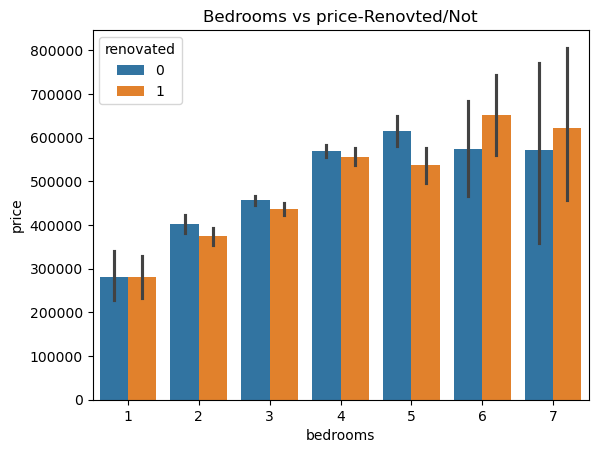

In [34]:
sns.barplot(x='bedrooms',y='price',data=df,hue='renovated')
plt.title('Bedrooms vs price-Renovted/Not')

Text(0.5, 1.0, 'Bathrooms vs Price')

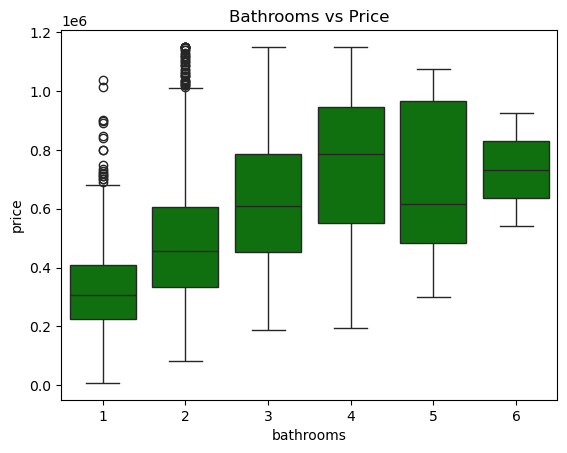

In [35]:
sns.boxplot(x='bathrooms',y='price',data=df,color='green')
plt.title('Bathrooms vs Price')

Text(0.5, 1.0, 'Bedrooms vs Price')

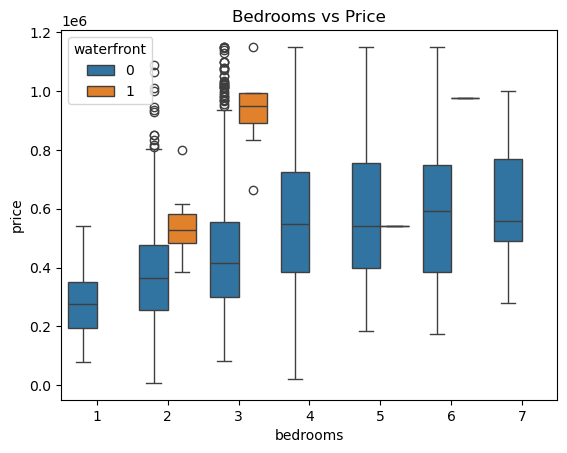

In [27]:
sns.boxplot(x='bedrooms',y='price',data=df,hue='waterfront')
plt.title('Bedrooms vs Price')

<Axes: xlabel='bedrooms', ylabel='count'>

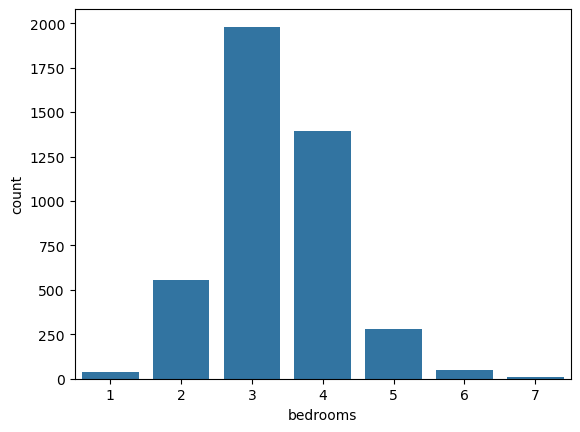

In [23]:
sns.countplot(x='bedrooms',data=df)


<Axes: xlabel='sqft_living', ylabel='price'>

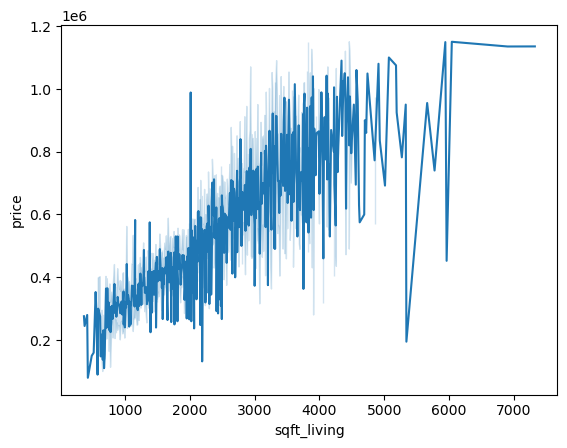

In [16]:
sns.lineplot(x='sqft_living',y='price',data=df)

<Axes: xlabel='sqft_living', ylabel='bedrooms'>

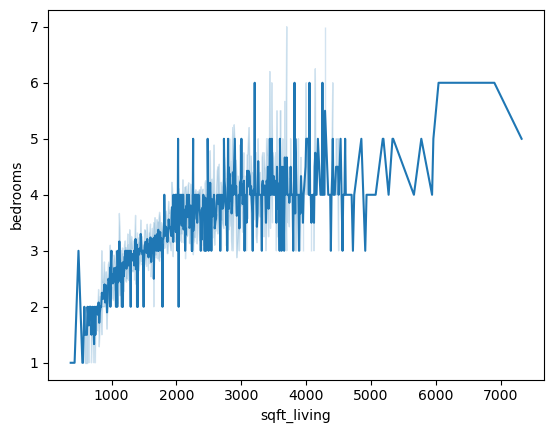

In [25]:
sns.lineplot(x='sqft_living',y='bedrooms',data=filtered_data)

Text(0.5, 1.0, 'Price Comparison: With vs Without Basement')

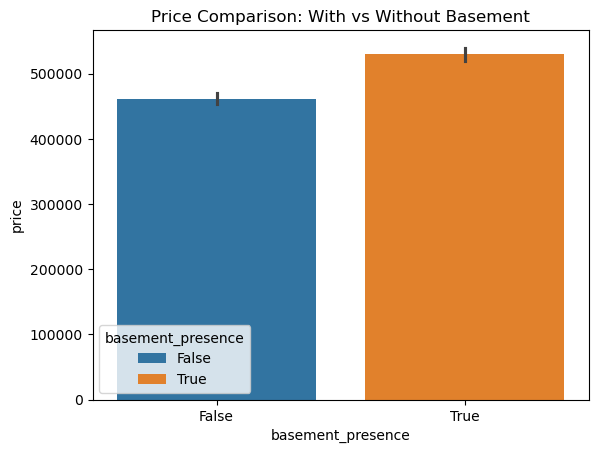

In [17]:
sns.barplot(x='basement_presence',y='price',data=df,hue='basement_presence')
plt.title('Price Comparison: With vs Without Basement')

Text(0.5, 1.0, 'Bedrooms vs Price')

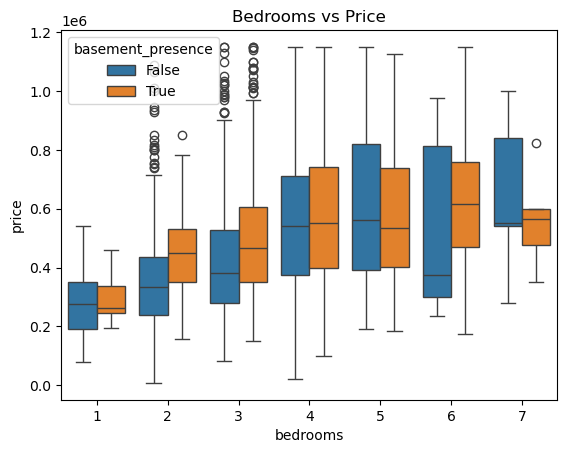

In [28]:
sns.boxplot(x='bedrooms',y='price',data=df,hue='basement_presence')
plt.title('Bedrooms vs Price')

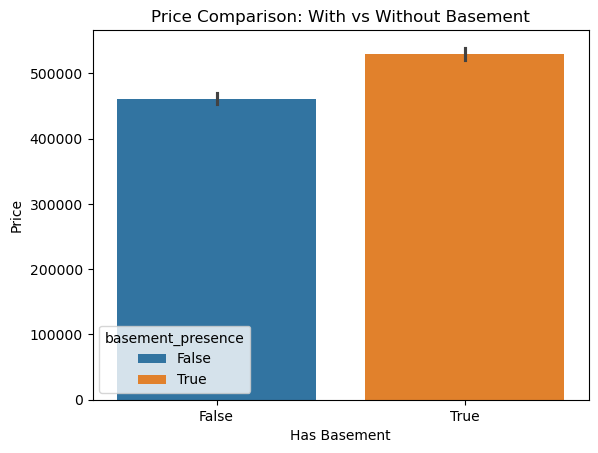

In [31]:
sns.barplot(x='basement_presence', y='price', data=df,hue='basement_presence')
plt.title('Price Comparison: With vs Without Basement')
plt.xlabel('Has Basement')
plt.ylabel('Price')
plt.show()


Text(0.5, 1.0, 'Bin the total_sqft values into range')

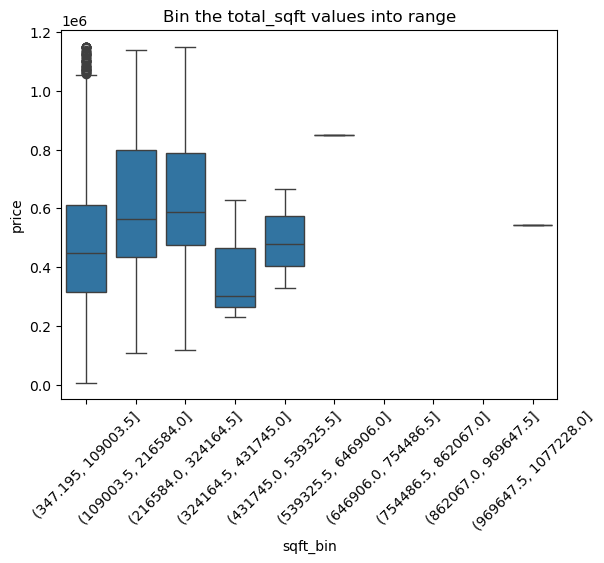

In [28]:
filtered_data['sqft_bin'] = pd.cut(filtered_data['total_sqft'], bins=10)
sns.boxplot(x='sqft_bin', y='price', data=filtered_data)
plt.xticks(rotation=45);
plt.title('Bin the total_sqft values into range')

Text(0.5, 1.0, 'Smoothed Relationship between Total Sqft and Price')

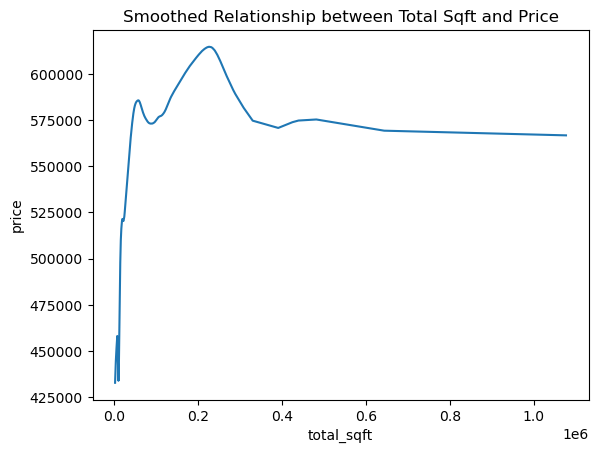

In [29]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
smoothed = lowess(filtered_data['price'], filtered_data['total_sqft'])

plt.plot(smoothed[:, 0], smoothed[:, 1])
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Smoothed Relationship between Total Sqft and Price')

In [19]:
city_stats = df.groupby(['city']).agg({ 'price': ['mean', 'median', 'count'],'sqft_living': 'mean','bedrooms': 'mean','bathrooms': 'mean'
}).reset_index()

city_stats.columns = ['city','avg_price', 'median_price', 'house_count', 'avg_sqft', 'avg_bedrooms', 'avg_bathrooms']

In [20]:
city_stats.sort_values(by='avg_price',ascending=False)

city      avg_price  median_price  house_count  \
8            Clyde Hill  994000.000000      945000.0            3   
23        Mercer Island  813935.904761      850000.0           49   
2    Beaux Arts Village  745000.000000      745000.0            1   
3              Bellevue  688188.316740      658500.0          226   
33            Sammamish  676198.640964      665000.0          164   
31              Redmond  639199.082627      625000.0          226   
25            Newcastle  631598.096774      595000.0           31   
43          Woodinville  597181.903670      559900.0          109   
19             Kirkland  585748.170614      507500.0          174   
16             Issaquah  579725.140449      560500.0          178   
29              Preston  562450.000000      562450.0            2   
38           Snoqualmie  548323.522388      527550.0           67   
39      Snoqualmie Pass  525000.000000      525000.0            1   
13            Fall City  516812.500000      524750.0            8   
30           Ravensdale  514071.428571      499000.0            7   
35              Seattle  509275.400524      475000.0         1435   
26        Normandy Park  493985.000000      455000.0           15   
44         Yarrow Point  491675.000000      491675.0            2   
5               Bothell  477583.306452      443000.0           31   
41               Unkown  476947.636364      445700.0           55   
20     Lake Forest Park  475215.151515      450000.0           33   
42               Vashon  472556.896552      445000.0           29   
7             Carnation  461427.150000      432175.0           20   
17              Kenmore  454378.564102      438000.0           65   
15  Inglewood-Finn Hill  425000.000000      425000.0            1   
11               Duvall  403994.126983      402750.0           42   
27           North Bend  399804.156028      391500.0           47   
36            Shoreline  398126.055077      360000.0          116   
4         Black Diamond  382056.250000      326500.0            8   
32               Renton  378097.959341      345000.0          285   
6                Burien  358640.227624      287475.0           72   
21         Maple Valley  340578.633333      321750.0           94   
12             Enumclaw  319007.716048      289000.0           27   
10           Des Moines  305817.854637      256000.0           57   
18                 Kent  299794.377634      283600.0          180   
1                Auburn  299038.272626      270000.0          171   
14          Federal Way  294883.653833      264950.0          141   
24               Milton  285000.000000      285000.0            2   
9             Covington  257935.178572      249700.0           40   
34               SeaTac  254051.000000      238500.0           28   
40              Tukwila  243943.285714      256500.0           28   
37            Skykomish  233000.000000      150000.0            3   
28              Pacific  225233.333333      221200.0            6   
0                Algona  207288.000000      230000.0            5   
22               Medina  188000.000000      188000.0            1   

       avg_sqft  avg_bedrooms  avg_bathrooms  
8   2816.666667      4.000000       2.333333  
23  2595.244898      3.816327       2.408163  
2   1490.000000      3.000000       2.000000  
3   2367.898230      3.730088       2.207965  
33  2751.408537      3.713415       2.329268  
31  2374.840708      3.402655       2.168142  
25  2599.354839      3.741935       2.451613  
43  2596.293578      3.532110       2.192661  
19  2151.137931      3.505747       2.212644  
16  2404.629213      3.533708       2.337079  
29  2280.000000      2.500000       2.500000  
38  2665.671642      3.507463       2.402985  
39  2100.000000      3.000000       3.000000  
13  2228.125000      3.500000       2.000000  
30  2612.857143      3.428571       1.857143  
35  1711.876655      3.110801       1.894774  
26  2057.933333      3.400000       2.000000 

In [21]:
city_stats.sort_values(by='house_count',ascending=False)

city      avg_price  median_price  house_count  \
35              Seattle  509275.400524      475000.0         1435   
32               Renton  378097.959341      345000.0          285   
3              Bellevue  688188.316740      658500.0          226   
31              Redmond  639199.082627      625000.0          226   
18                 Kent  299794.377634      283600.0          180   
16             Issaquah  579725.140449      560500.0          178   
19             Kirkland  585748.170614      507500.0          174   
1                Auburn  299038.272626      270000.0          171   
33            Sammamish  676198.640964      665000.0          164   
14          Federal Way  294883.653833      264950.0          141   
36            Shoreline  398126.055077      360000.0          116   
43          Woodinville  597181.903670      559900.0          109   
21         Maple Valley  340578.633333      321750.0           94   
6                Burien  358640.227624      287475.0           72   
38           Snoqualmie  548323.522388      527550.0           67   
17              Kenmore  454378.564102      438000.0           65   
10           Des Moines  305817.854637      256000.0           57   
41               Unkown  476947.636364      445700.0           55   
23        Mercer Island  813935.904761      850000.0           49   
27           North Bend  399804.156028      391500.0           47   
11               Duvall  403994.126983      402750.0           42   
9             Covington  257935.178572      249700.0           40   
20     Lake Forest Park  475215.151515      450000.0           33   
25            Newcastle  631598.096774      595000.0           31   
5               Bothell  477583.306452      443000.0           31   
42               Vashon  472556.896552      445000.0           29   
40              Tukwila  243943.285714      256500.0           28   
34               SeaTac  254051.000000      238500.0           28   
12             Enumclaw  319007.716048      289000.0           27   
7             Carnation  461427.150000      432175.0           20   
26        Normandy Park  493985.000000      455000.0           15   
13            Fall City  516812.500000      524750.0            8   
4         Black Diamond  382056.250000      326500.0            8   
30           Ravensdale  514071.428571      499000.0            7   
28              Pacific  225233.333333      221200.0            6   
0                Algona  207288.000000      230000.0            5   
8            Clyde Hill  994000.000000      945000.0            3   
37            Skykomish  233000.000000      150000.0            3   
44         Yarrow Point  491675.000000      491675.0            2   
29              Preston  562450.000000      562450.0            2   
24               Milton  285000.000000      285000.0            2   
39      Snoqualmie Pass  525000.000000      525000.0            1   
15  Inglewood-Finn Hill  425000.000000      425000.0            1   
2    Beaux Arts Village  745000.000000      745000.0            1   
22               Medina  188000.000000      188000.0            1   

       avg_sqft  avg_bedrooms  avg_bathrooms  
35  1711.876655      3.110801       1.894774  
32  2101.070175      3.470175       2.007018  
3   2367.898230      3.730088       2.207965  
31  2374.840708      3.402655       2.168142  
18  1987.916667      3.466667       1.983333  
16  2404.629213      3.533708       2.337079  
19  2151.137931      3.505747       2.212644  
1   2000.105263      3.409357       2.011696  
33  2751.408537      3.713415       2.329268  
14  2062.546099      3.517730       2.035461  
36  1736.163793      3.267241       1.758621  
43  2596.293578      3.532110       2.192661  
21  2088.510638      3.478723       2.063830  
6   1800.486111      3.277778       1.777778  
38  2665.671642      3.507463       2.402985  
17  2122.076923      3.553846       2.092308  
10  1820.385965      3.245614       1.859649 

In [22]:
df['renovated']=df['yr_renovated'].apply(lambda x:0 if x==0 else 1)
df['price_per_sqft']=df['price']/df['sqft_living']

In [23]:
sqft_city=df.groupby('city')['price_per_sqft'].mean()

In [24]:
lowest_price_per_sqft=sqft_city.sort_values(ascending=True).head(5)
lowest_price_per_sqft.reset_index()

city  price_per_sqft
0       Medina       57.668712
1       Algona      129.127871
2      Tukwila      144.745993
3  Federal Way      148.351824
4    Covington      148.959691

In [25]:
highest_price_per_sqft=sqft_city.sort_values(ascending=False).head(5)
highest_price_per_sqft.reset_index()

city  price_per_sqft
0  Beaux Arts Village      500.000000
1          Clyde Hill      364.725017
2       Mercer Island      328.075341
3        Yarrow Point      319.752338
4             Seattle      313.052152

In [26]:
count_city=df.groupby(['city']).agg({'price':'count','price_per_sqft':'mean'}).reset_index()
count_city.columns=['city','house_count','price_per_sqft']
count_city.sort_values(by='house_count',ascending=False)

city  house_count  price_per_sqft
35              Seattle         1435      313.052152
32               Renton          285      185.917037
3              Bellevue          226      306.507973
31              Redmond          226      278.315011
18                 Kent          180      155.026193
16             Issaquah          178      250.628782
19             Kirkland          174      279.982397
1                Auburn          171      152.455922
33            Sammamish          164      253.216014
14          Federal Way          141      148.351824
36            Shoreline          116      242.516667
43          Woodinville          109      238.462298
21         Maple Valley           94      165.358540
6                Burien           72      203.764768
38           Snoqualmie           67      215.237236
17              Kenmore           65      221.973793
10           Des Moines           57      170.145304
41               Unkown           55      237.460236
23        Mercer Island           49      328.075341
27           North Bend           47      213.264883
11               Duvall           42      190.556922
9             Covington           40      148.959691
20     Lake Forest Park           33      219.857852
25            Newcastle           31      247.305239
5               Bothell           31      213.435485
42               Vashon           29      266.942994
40              Tukwila           28      144.745993
34               SeaTac           28      164.336272
12             Enumclaw           27      171.384891
7             Carnation           20      229.022256
26        Normandy Park           15      257.275191
13            Fall City            8      228.240369
4         Black Diamond            8      252.492729
30           Ravensdale            7      199.680083
28              Pacific            6      157.684789
0                Algona            5      129.127871
8            Clyde Hill            3      364.725017
37            Skykomish            3      200.824176
44         Yarrow Point            2      319.752338
29              Preston            2      264.723067
24               Milton            2      226.437444
39      Snoqualmie Pass            1      250.000000
15  Inglewood-Finn Hill            1      279.605263
2    Beaux Arts Village            1      500.000000
22               Medina            1       57.668712

Text(0.5, 1.0, 'House count vs Price')

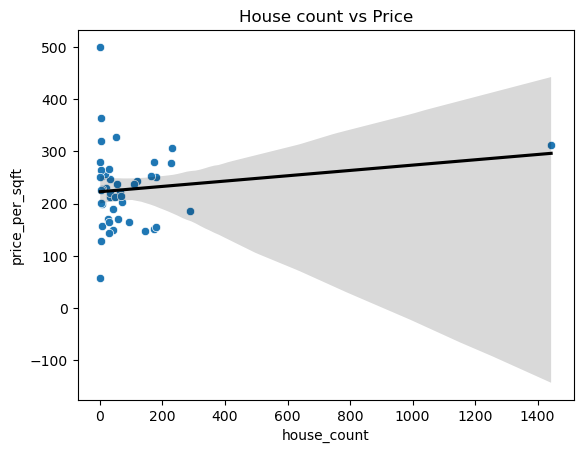

In [40]:
sns.scatterplot(x='house_count', y='price_per_sqft', data=count_city)
sns.regplot(x='house_count', y='price_per_sqft',scatter=False,data=count_city,color='black')
plt.title('House count vs Price')

Text(0.5, 1.0, 'count vs Renovated')

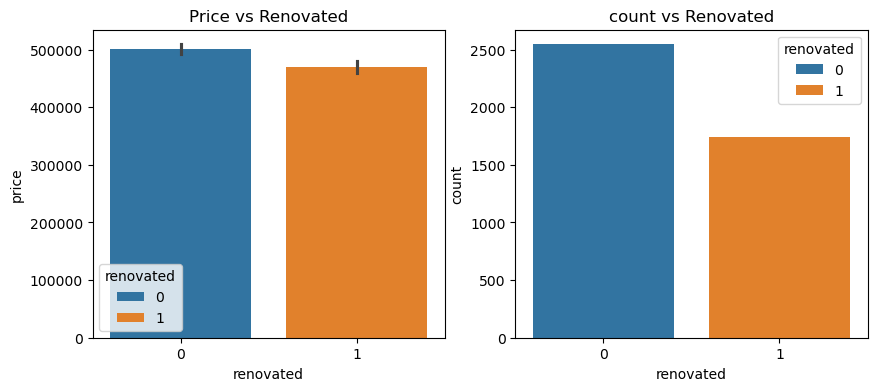

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='renovated',y='price',data=df,hue='renovated')
plt.title('Price vs Renovated')
plt.subplot(1,2,2)
sns.countplot(x='renovated',data=df,hue='renovated')
plt.title('count vs Renovated')

Text(0.5, 1.0, 'Price vs Age')

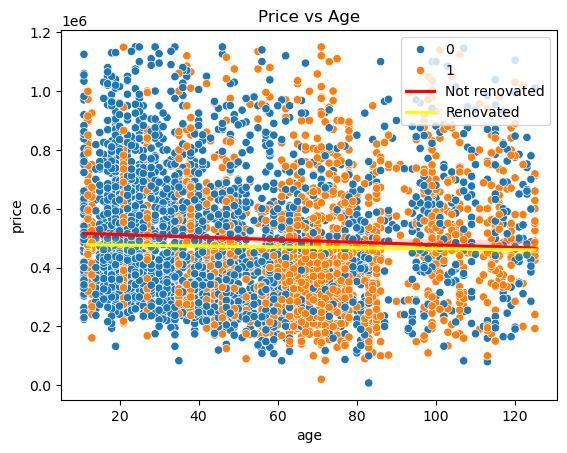

In [33]:
sns.scatterplot(x='age',y='price',data=df,hue='renovated')
sns.regplot(x='age',y='price',data=df[df['renovated']==0],scatter=False,color='red',label='Not renovated')
sns.regplot(x='age',y='price',data=df[df['renovated']==1],scatter=False,color='yellow',label='Renovated')
plt.legend()
plt.title('Price vs Age')

Text(0.5, 1.0, 'Heat map-Correlation')

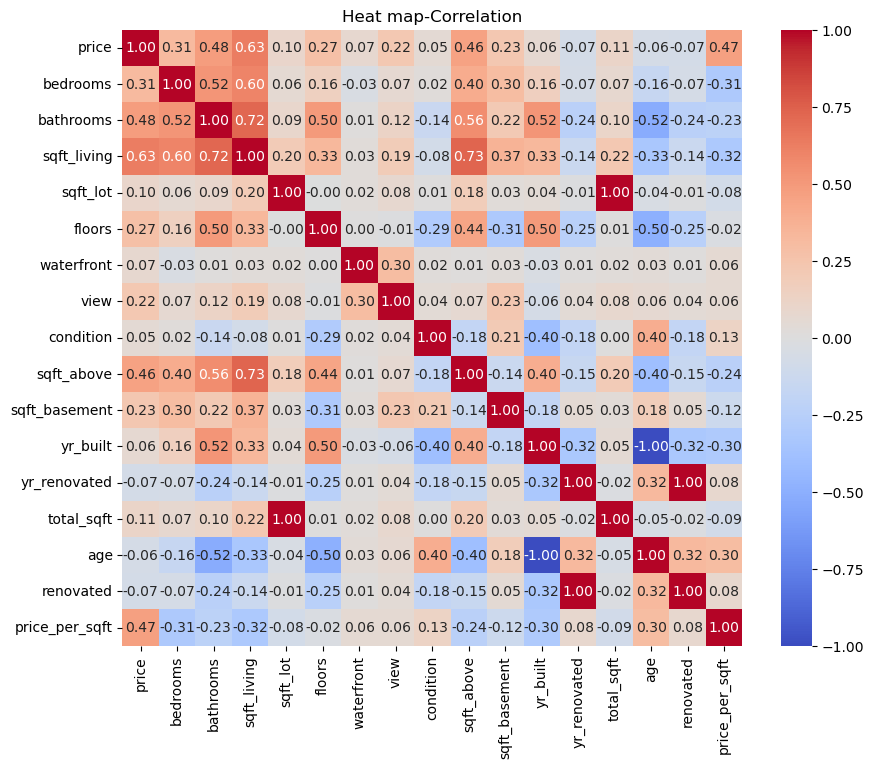

In [46]:
plt.figure(figsize=(10,8))
correlation=filtered_data.select_dtypes(include=[float,int]).corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heat map-Correlation')

In [45]:
del filtered_data['Unnamed: 0']

Text(0.5, 1.0, 'Waterfront vs count')

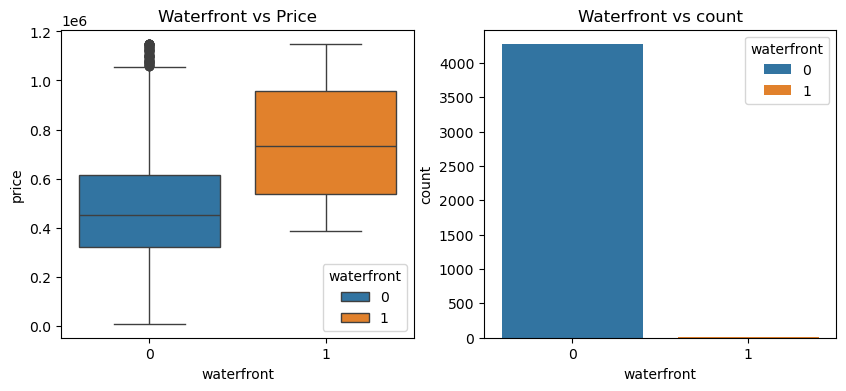

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='waterfront',y='price',data=df,hue='waterfront')
plt.title('Waterfront vs Price')
plt.subplot(1,2,2)
sns.countplot(x='waterfront',data=df,hue='waterfront')
plt.title('Waterfront vs count')

Text(0.5, 1.0, 'View vs count')

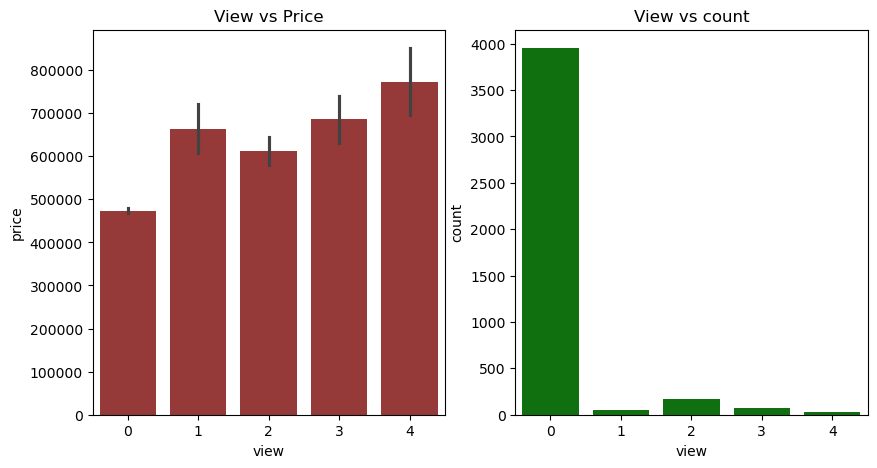

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='view',y='price',data=df,color='brown')
plt.title('View vs Price')
plt.subplot(1,2,2)
sns.countplot(x='view',data=df,color='green')
plt.title('View vs count')

Text(0.5, 1.0, 'Condition vs Count')

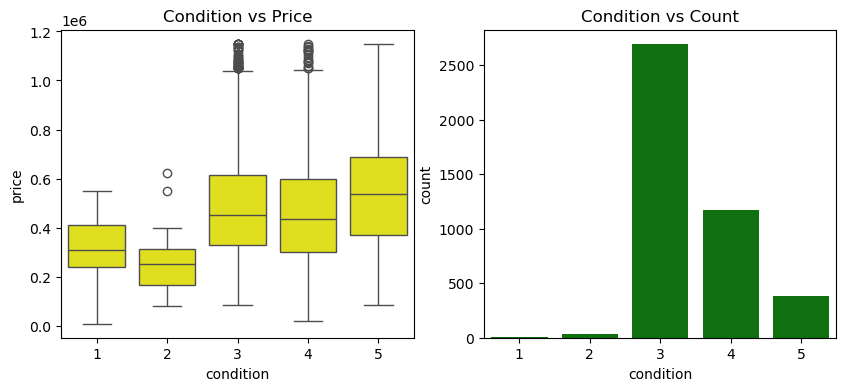

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='condition',y='price',data=df,color='yellow')
plt.title('Condition vs Price')
plt.subplot(1,2,2)
sns.countplot(x='condition',data=df,color='green')
plt.title('Condition vs Count')

Text(0.5, 1.0, 'Condition vs Count')

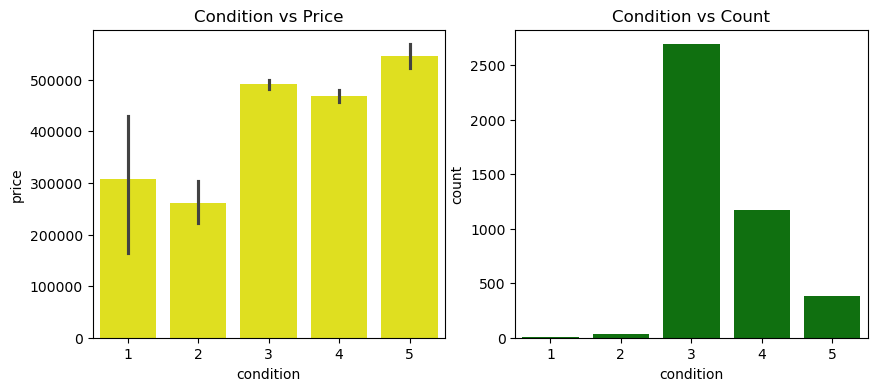

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='condition',y='price',data=df,color='yellow')
plt.title('Condition vs Price')
plt.subplot(1,2,2)
sns.countplot(x='condition',data=df,color='green')
plt.title('Condition vs Count')

<Axes: xlabel='condition', ylabel='price_per_sqft'>

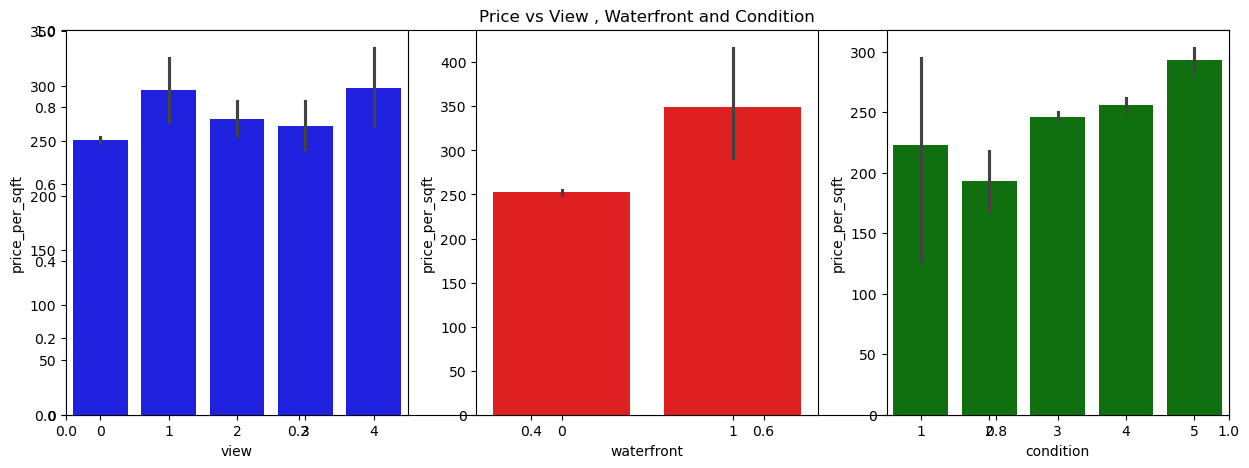

In [31]:
plt.figure(figsize=(15,5))
plt.title('Price vs View , Waterfront and Condition')
plt.subplot(1,3,1)
sns.barplot(x='view',y='price_per_sqft',data=df,color='blue')
plt.subplot(1,3,2)
sns.barplot(x='waterfront',y='price_per_sqft',data=df,color='red')
plt.subplot(1,3,3)
sns.barplot(x='condition',y='price_per_sqft',data=df,color='green')

<Axes: xlabel='condition', ylabel='price_per_sqft'>

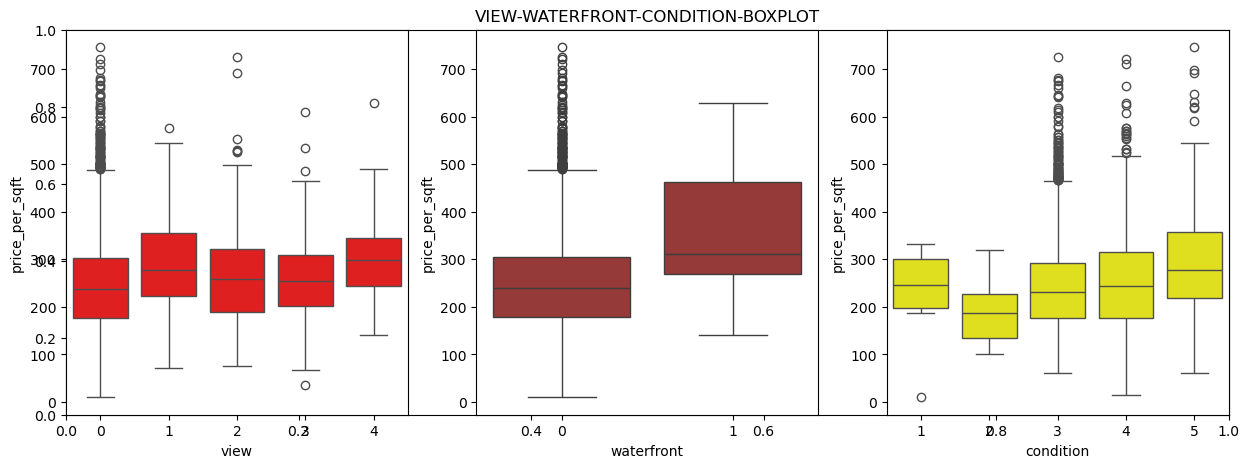

In [46]:
plt.figure(figsize=(15,5))
plt.title('VIEW-WATERFRONT-CONDITION-BOXPLOT')
plt.subplot(1,3,1)
sns.boxplot(x='view',y='price_per_sqft',data=df,color='red')
plt.subplot(1,3,2)
sns.boxplot(x='waterfront',y='price_per_sqft',data=df,color='brown')
plt.subplot(1,3,3)
sns.boxplot(x='condition',y='price_per_sqft',data=df,color='yellow')

In [52]:
filtered_data.describe()

price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  4.307000e+03  4307.000000  4307.000000  4307.000000  4.307000e+03   
mean   4.872357e+05     3.350128     2.094033  2029.331883  1.460834e+04   
std    2.156579e+05     0.873037     0.713754   806.679224  3.613794e+04   
min    7.800000e+03     1.000000     0.750000   370.000000  6.380000e+02   
25%    3.200000e+05     3.000000     1.750000  1440.000000  5.000000e+03   
50%    4.500000e+05     3.000000     2.250000  1930.000000  7.599000e+03   
75%    6.150000e+05     4.000000     2.500000  2500.000000  1.073850e+04   
max    1.150000e+06     7.000000     5.750000  7320.000000  1.074218e+06   

            floors   waterfront         view    condition    sqft_above  \
count  4307.000000  4307.000000  4307.000000  4307.000000   4307.000000   
mean      1.494660     0.003715     0.173439     3.443928   1761.127467   
std       0.535952     0.060844     0.644647     0.669349    893.191096   
min       1.000000     0.000000     0.000000     1.000000    350.000000   
25%       1.000000     0.000000     0.000000     3.000000   1170.000000   
50%       1.500000     0.000000     0.000000     3.000000   1540.000000   
75%       2.000000     0.000000     0.000000     4.000000   2190.000000   
max       3.500000     1.000000     4.000000     5.000000  20450.000000   

       sqft_basement     yr_built  yr_renovated    total_sqft          age  \
count    4307.000000  4285.000000   4307.000000  4.307000e+03  4285.000000   
mean      283.126306  1970.907351    809.938008  1.663767e+04    54.092649   
std       421.984149    29.501548    979.713992  3.630857e+04    29.501548   
min         0.000000  1900.000000      0.000000  1.423000e+03    11.000000   
25%         0.000000  1951.000000      0.000000  6.939000e+03    29.000000   
50%         0.000000  1976.000000      0.000000  9.512000e+03    49.000000   
75%       560.000000  1996.000000   1999.000000  1.297247e+04    74.000000   
max      2300.000000  2014.000000   2014.000000  1.077228e+06   125.000000   

         renovated  price_per_sqft  
count  4307.000000     4307.000000  
mean      0.406083      252.404848  
std       0.491157       97.789196  
min       0.000000       10.000000  
25%       0.000000      179.451199  
50%       0.000000      239.043825  
75%       1.000000      304.301573  
max       1.000000      745.945946

<Axes: xlabel='condition', ylabel='bedrooms'>

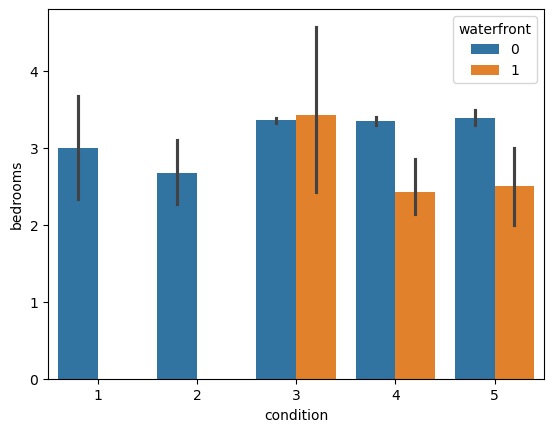

In [53]:
sns.barplot(x='condition',y='bedrooms',data=filtered_data,hue='waterfront')

In [6]:
from scipy.stats import ttest_ind
df = pd.read_csv('Housing Data(cleaned).csv')
group1 = df[df['basement_presence'] == False]['price']  
group2 = df[df['basement_presence'] == True]['price']  
t_stat, p_val = ttest_ind(group1, group2, equal_var=True)  
print("t-statistic:", t_stat)
print("p-value:", p_val)
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

t-statistic: -10.290048292401666
p-value: 1.5057483375000594e-24
Reject the null hypothesis: There is a significant difference between the groups.


In [7]:
from scipy.stats import ttest_ind
df = pd.read_csv('Housing Data(cleaned).csv')

group1 = df[df['renovated'] == 1]['price']  
group2 = df[df['renovated'] == 0]['price']  
t_stat, p_val = ttest_ind(group1, group2, equal_var=True)  
print("t-statistic:", t_stat)
print("p-value:", p_val)
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

t-statistic: -4.681907875300159
p-value: 2.9300808023421773e-06
Reject the null hypothesis: There is a significant difference between the groups.


In [9]:
from statsmodels.stats.weightstats import ztest
df = pd.read_csv('Housing Data(cleaned).csv')
group1 = df[df['basement_presence'] == False]['price']  
group2 = df[df['basement_presence'] == True]['price']  
z_stat, p_val = ztest(group1, group2,)  
print("z-statistic:", t_stat)
print("p-value:", p_val)
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

z-statistic: -4.681907875300159
p-value: 7.813717469878196e-25
Reject the null hypothesis: There is a significant difference between the groups.


In [16]:
df = pd.read_csv('Housing Data(cleaned).csv')

In [17]:
del df['Unnamed: 0']

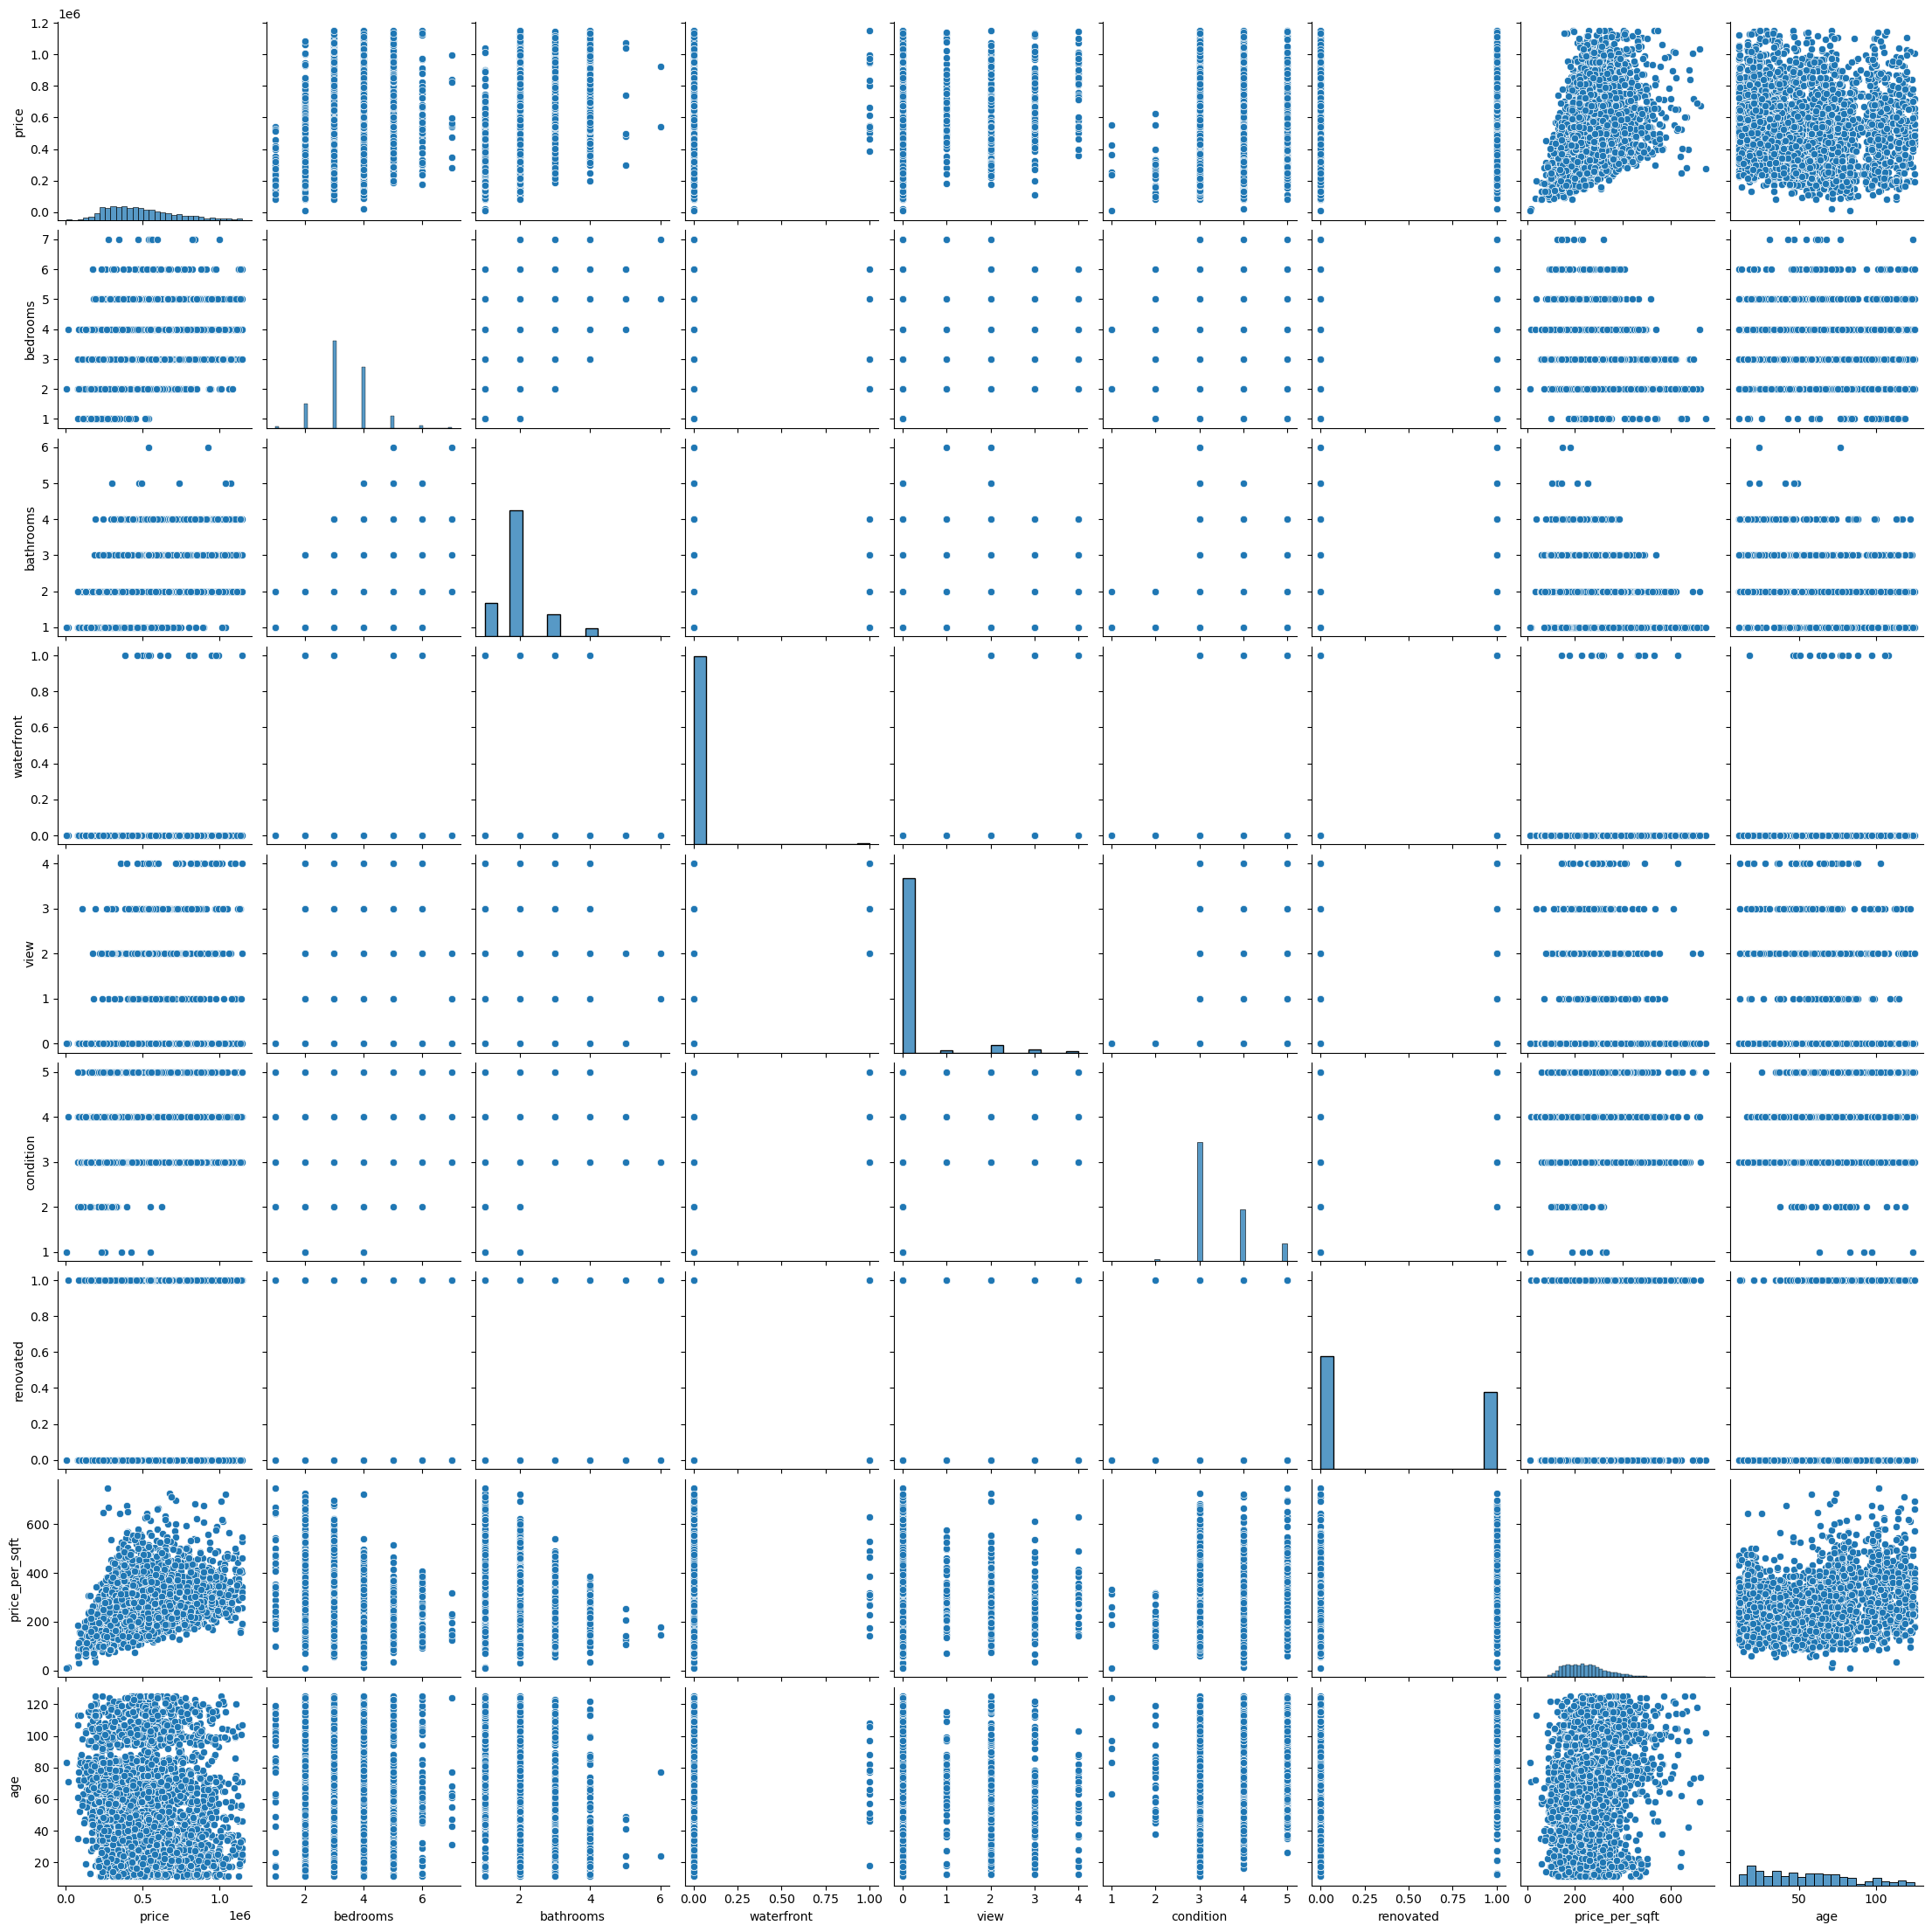

In [22]:
sns.pairplot(df,vars=['price','bedrooms','bathrooms','waterfront','view','condition','renovated','price_per_sqft','age'])

In [18]:
df

date        price  bedrooms  bathrooms  sqft_living      sqft_lot  \
0     2014-05-02  313000.0000         3          2       1340.0  14859.809856   
1     2014-05-02  342000.0000         3          2       1930.0  14859.809856   
2     2014-05-02  420000.0000         3          2       2000.0  14859.809856   
3     2014-05-02  550000.0000         4          2       1940.0  14859.809856   
4     2014-05-02  490000.0000         2          1        880.0  14859.809856   
...          ...          ...       ...        ...          ...           ...   
4280  2014-07-02  268971.8750         4          2       1954.0   4805.000000   
4281  2014-07-02  318000.0000         2          2       1530.0   3503.000000   
4282  2014-07-02  550607.1429         4          2       1660.0   4800.000000   
4283  2014-07-02  584000.0000         3          2       1490.0   1036.000000   
4284  2014-07-02  245000.0000         3          3       2470.0   7410.000000   

      floors  waterfront  view  condition  ...                    street  \
0        1.5           0     0          3  ...      18810 Densmore Ave N   
1        1.0           0     0          4  ...  26206-26214 143rd Ave SE   
2        1.0           0     0          4  ...           857 170th Pl NE   
3        1.0           0     0          4  ...         9105 170th Ave NE   
4        1.0           0     0          3  ...            522 NE 88th St   
...      ...         ...   ...        ...  ...                       ...   
4280     2.0           0     0          3  ...        19320 113th Ave SE   
4281     1.0           0     1          4  ...           1922 11th Ave W   
4282     1.5           0     0          3  ...  4007 Woodland Park Ave N   
4283     2.0           0     0          3  ...          4304B 36th Ave W   
4284     2.0           0     0          5  ...          8833 Earl Ave NW   

           city  statezip  country month basement_presence    total_sqft  \
0     Shoreline  WA 98133      USA     5             False  16199.809856   
1          Kent  WA 98042      USA     5             False  16789.809856   
2      Bellevue  WA 98008      USA     5              True  16859.809856   
3       Redmond  WA 98052      USA     5              True  16799.809856   
4       Seattle  WA 98115      USA     5             False  15739.809856   
...         ...       ...      ...   ...               ...           ...   
4280       Kent  WA 98031      USA     7             False   6759.000000   
4281    Seattle  WA 98119      USA     7              True   5033.000000   
4282    Seattle  WA 98103      USA     7             False   6460.000000   
4283    Seattle  WA 98199      USA     7              True   2526.000000   
4284    Seattle  WA 98117      USA     7              True   9880.000000   

     renovated  price_per_sqft  age  
0            1      233.582090   70  
1            0      177.202073   59  
2            0      210.000000   62  
3            1      283.505155   49  
4            1      556.818182   87  
...        ...             ...  ...  
4280         0      137.651932   20  
4281         0      207.843137  109  
4282         1      331.691050  103  
4283         0      391.946309   17  
4284         0       99.190283   48  

[4285 rows x 24 columns]

In [19]:
df.to_csv('Housing Data(cleaned).csv',index=False)

In [20]:
df=pd.read_csv('Housing Data(cleaned).csv')
df

date        price  bedrooms  bathrooms  sqft_living      sqft_lot  \
0     2014-05-02  313000.0000         3          2       1340.0  14859.809856   
1     2014-05-02  342000.0000         3          2       1930.0  14859.809856   
2     2014-05-02  420000.0000         3          2       2000.0  14859.809856   
3     2014-05-02  550000.0000         4          2       1940.0  14859.809856   
4     2014-05-02  490000.0000         2          1        880.0  14859.809856   
...          ...          ...       ...        ...          ...           ...   
4280  2014-07-02  268971.8750         4          2       1954.0   4805.000000   
4281  2014-07-02  318000.0000         2          2       1530.0   3503.000000   
4282  2014-07-02  550607.1429         4          2       1660.0   4800.000000   
4283  2014-07-02  584000.0000         3          2       1490.0   1036.000000   
4284  2014-07-02  245000.0000         3          3       2470.0   7410.000000   

      floors  waterfront  view  condition  ...                    street  \
0        1.5           0     0          3  ...      18810 Densmore Ave N   
1        1.0           0     0          4  ...  26206-26214 143rd Ave SE   
2        1.0           0     0          4  ...           857 170th Pl NE   
3        1.0           0     0          4  ...         9105 170th Ave NE   
4        1.0           0     0          3  ...            522 NE 88th St   
...      ...         ...   ...        ...  ...                       ...   
4280     2.0           0     0          3  ...        19320 113th Ave SE   
4281     1.0           0     1          4  ...           1922 11th Ave W   
4282     1.5           0     0          3  ...  4007 Woodland Park Ave N   
4283     2.0           0     0          3  ...          4304B 36th Ave W   
4284     2.0           0     0          5  ...          8833 Earl Ave NW   

           city  statezip  country month basement_presence    total_sqft  \
0     Shoreline  WA 98133      USA     5             False  16199.809856   
1          Kent  WA 98042      USA     5             False  16789.809856   
2      Bellevue  WA 98008      USA     5              True  16859.809856   
3       Redmond  WA 98052      USA     5              True  16799.809856   
4       Seattle  WA 98115      USA     5             False  15739.809856   
...         ...       ...      ...   ...               ...           ...   
4280       Kent  WA 98031      USA     7             False   6759.000000   
4281    Seattle  WA 98119      USA     7              True   5033.000000   
4282    Seattle  WA 98103      USA     7             False   6460.000000   
4283    Seattle  WA 98199      USA     7              True   2526.000000   
4284    Seattle  WA 98117      USA     7              True   9880.000000   

     renovated  price_per_sqft  age  
0            1      233.582090   70  
1            0      177.202073   59  
2            0      210.000000   62  
3            1      283.505155   49  
4            1      556.818182   87  
...        ...             ...  ...  
4280         0      137.651932   20  
4281         0      207.843137  109  
4282         1      331.691050  103  
4283         0      391.946309   17  
4284         0       99.190283   48  

[4285 rows x 24 columns]